<a id="4"></a>
<h1 style="background-color:orange;font-family:monospace;font-size:250%;text-align:center">Briefing</h1>

## Define Business Problem

* Resource Management: Medical facilities need to allocate resources (staff, time, equipment) efficiently. No-shows lead to wasted resources and reduced efficiency.
* Financial Impact: Missed appointments result in financial losses for healthcare providers due to unbilled time and resources.
* Patient Health: Regular appointments are crucial for patient health management. No-shows can lead to deteriorating health conditions and higher long-term healthcare costs.
* Operational Planning: Predicting no-shows allows better planning and management of appointments, potentially reducing waiting times for other patients.



## Model Metrics

- Use AUC-ROC to pick the best model.
- Recall (Sensitivity): The proportion of actual no-shows that were correctly identified by the model. High recall ensures that most of the no-shows are identified and thus, you can take action (e.g., sending reminders or follow-up messages) to mitigate them.
- Precision: The proportion of predicted no-shows that are actually no-shows. High precision ensures that when you do take action, it is well-targeted, reducing unnecessary actions for clients who are not actually no-shows. Reduce the cost of miss calling the people who actually show up

## Data Source

Patient medical appointment that contains medical appointment history and their no-show status for each appointment.

* Column,Description
* MemberID,Member ID
* AppointmentID,Appointment ID
* Gender,"M = Male, F = Female"
* ScheduledDay,Date the appointment was scheduled
* AppointmentDay,Actual appointment date
* Age,Age
* LocationID,Patient Geography ID
* MedicaidIND,"1 = Medicaid patient, 0 = Non-Medicaid patient"
* Hypertension,"Hypertension indicator 1 = Yes, 0 = No"
* Diabetes,"Diabetes indicator 1 = Yes, 0 = No"
* Alcoholism,"Alcoholism indicator 1 = Yes, 0 = No"
* Disability,"Disability indicator 1 = Yes, 0 = No"
* SMS_received,"Text was sent to patient as an appointment reminder 1 = Yes, 0 = 'NO"
* No-show,"Yes = Did not attend the appointment, No = Appoinment was kept"


<a id="4"></a>
<h1 style="background-color:orange;font-family:monospace;font-size:250%;text-align:center">Business Understanding</h1>

Problem: Large amount of patient miss their cilinic appointments, which effect the hospital resource allocation and patient health condition.

Purpose: build a model to predict the no-showing patients, give data insights and strategies to improve the pateints showing up rate.

<a id="4"></a>
<h1 style="background-color:orange;font-family:monospace;font-size:250%;text-align:center">Proposed Solution</h1>

I will follow these steps to build a classification model with the provided dataset:

1. Data examination
    - feature columns; missing values; target laebl
2. EDA
    - univariate analysis; multivariate analysis
    - numerical values; categrical values
    - feature selection using statistical method and algorithm based method
3. Modelling
    - transformer; pipeline
    - logistic regression
    - tree based model

<a id="4"></a>
<h1 style="background-color:orange;font-family:monospace;font-size:250%;text-align:center">Data Wrangling, Feature Engineering and EDA</h1>


## Load Libraries

In [11]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")


# to visualize all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## General Properties

In [12]:

#df = pd.read_csv("C:/myNotebook/qingzhou intermountain healthcare takehome/Medical_No_Shows_Candidate/Medical_No_Shows.csv")
df = pd.read_csv("C:/myNotebook/qingzhou intermountain healthcare takehome/Medical_No_Shows_Candidate/Medical_No_Shows.csv")
df.head()

PatientID  AppointmentID Gender          ScheduledDay  \
0   #29872499824296        5642903      F  2016-04-29T18:38:08Z   
1  #558997776694438        5642503      M  2016-04-29T16:08:27Z   
2    #4262962299951        5642549      F  2016-04-29T16:19:04Z   
3     #867951213174        5642828      F  2016-04-29T17:29:31Z   
4    #8841186448183        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age  LocationID  MedicaidIND  Hypertension  Diabetes  \
0  2016-04-29T00:00:00Z   62          40            0             1         0   
1  2016-04-29T00:00:00Z   56          40            0             0         0   
2  2016-04-29T00:00:00Z   62          47            0             0         0   
3  2016-04-29T00:00:00Z    8          55            0             0         0   
4  2016-04-29T00:00:00Z   56          40            0             1         1   

   Alcoholism  Disability  SMS_received No-show  
0           0           0             0      No  
1           0           0             0      No  
2           0           0             0      No  
3           0           0             0      No  
4           0           0             0      No

In [13]:
df.shape

(110527, 14)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientID       110527 non-null  object
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   LocationID      110527 non-null  int64 
 7   MedicaidIND     110527 non-null  int64 
 8   Hypertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Disability      110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [15]:
#check if there is null value in NO_SHOW  column.
df.isnull().sum()

PatientID         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
LocationID        0
MedicaidIND       0
Hypertension      0
Diabetes          0
Alcoholism        0
Disability        0
SMS_received      0
No-show           0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.nunique()

PatientID          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
LocationID            81
MedicaidIND            2
Hypertension           2
Diabetes               2
Alcoholism             2
Disability             5
SMS_received           2
No-show                2
dtype: int64

In [18]:
df.describe()

AppointmentID            Age     LocationID    MedicaidIND  \
count   1.105270e+05  110527.000000  110527.000000  110527.000000   
mean    5.675305e+06      37.088874      42.413076       0.098266   
std     7.129575e+04      23.110205      21.885394       0.297675   
min     5.030230e+06      -1.000000       1.000000       0.000000   
25%     5.640286e+06      18.000000      27.000000       0.000000   
50%     5.680573e+06      37.000000      41.000000       0.000000   
75%     5.725524e+06      55.000000      61.000000       0.000000   
max     5.790484e+06     115.000000      81.000000       1.000000   

        Hypertension       Diabetes     Alcoholism     Disability  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

Luckily, we have no missing values and duplicate data. According to the project task, our goal is to predict the probalility of 'no-show' columns.
- countinuous features: Age
- binary features: Gender, MedicaidIND, Hypertension, Diabetes, Alcoholism, Disability, SMS_received
- categorical features: LocationID
- datetime features: ScheduledDay, AppointmentDay





In [19]:
# List names of all columns
df.columns

Index(['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'LocationID', 'MedicaidIND', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Disability', 'SMS_received', 'No-show'],
      dtype='object')

In [20]:
# Drop  'AppointmentID' as they are just some system genrated numbers.
df.drop(['AppointmentID'], axis=1, inplace=True)

In [21]:
# Print Unique Values
print("Unique Values in `Gender` => {}".format(df.Gender.unique()))
print("Unique Values in `MedicaidIND` => {}".format(df.MedicaidIND.unique()))
print("Unique Values in `Hypertension` => {}".format(df.Hypertension.unique()))
print("Unique Values in `Diabetes` => {}".format(df.Diabetes.unique()))
print("Unique Values in `Alcoholism` => {}".format(df.Alcoholism.unique()))
print("Unique Values in `Disability` => {}".format(df.Disability.unique()))
print("Unique Values in `SMS_received` => {}".format(df.SMS_received.unique()))

Unique Values in `Gender` => ['F' 'M']
Unique Values in `MedicaidIND` => [0 1]
Unique Values in `Hypertension` => [1 0]
Unique Values in `Diabetes` => [0 1]
Unique Values in `Alcoholism` => [0 1]
Unique Values in `Disability` => [0 1 2 3 4]
Unique Values in `SMS_received` => [0 1]


In [22]:
# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientID       110527 non-null  object        
 1   Gender          110527 non-null  object        
 2   ScheduledDay    110527 non-null  datetime64[ns]
 3   AppointmentDay  110527 non-null  datetime64[ns]
 4   Age             110527 non-null  int64         
 5   LocationID      110527 non-null  int64         
 6   MedicaidIND     110527 non-null  int64         
 7   Hypertension    110527 non-null  int64         
 8   Diabetes        110527 non-null  int64         
 9   Alcoholism      110527 non-null  int64         
 10  Disability      110527 non-null  int64         
 11  SMS_received    110527 non-null  int64         
 12  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(8), object(3)
memory usage: 11.0+ MB


In [24]:
df.head()

PatientID Gender ScheduledDay AppointmentDay  Age  LocationID  \
0   #29872499824296      F   2016-04-29     2016-04-29   62          40   
1  #558997776694438      M   2016-04-29     2016-04-29   56          40   
2    #4262962299951      F   2016-04-29     2016-04-29   62          47   
3     #867951213174      F   2016-04-29     2016-04-29    8          55   
4    #8841186448183      F   2016-04-29     2016-04-29   56          40   

   MedicaidIND  Hypertension  Diabetes  Alcoholism  Disability  SMS_received  \
0            0             1         0           0           0             0   
1            0             0         0           0           0             0   
2            0             0         0           0           0             0   
3            0             0         0           0           0             0   
4            0             1         1           0           0             0   

  No-show  
0      No  
1      No  
2      No  
3      No  
4      No

In [25]:

# Since there are mostly categorical columns, lets have some plot functions for catagorical columns

# 1. define plot count

def plot_counts(df, category_col, target_col, length, height, fontsize, show_counts=True):
    df[category_col] = df[category_col].astype(str)
    df[target_col] = df[target_col].astype(str)

    fig = plt.figure(figsize=(length, height))
    ax = sns.countplot(x=category_col, hue=target_col, data=df)

    if show_counts:
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{int(height)}',
                        xy=(p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 5),
                        textcoords='offset points', fontsize=fontsize)

    plt.title(f'{category_col} by {target_col}')
    plt.show()

def plot_normalized_counts(df, category_col, target_col, length, height, fontsize, show_percentages=True):
    """
    Plot a normalized bar plot of the counts of 0 and 1 in each category of a categorical column.

    Args:
    df (pandas dataframe): The input dataframe.
    category_col (str): The name of the categorical column.
    target_col (str): The name of the target column.
    length (float): The length of the plot.
    height (float): The height of the plot.

    Returns:
    None.
    """
    df[category_col] = df[category_col].astype(str)
    df[target_col] = df[target_col].astype(str)
    # Calculate the normalized count for each category
    counts = df.groupby([category_col, target_col]).size().reset_index(name='count')
    counts['percent'] = counts.groupby(category_col)['count'].transform(lambda x: x / x.sum() * 100)

    # Plot a bar plot of the normalized counts
    fig = plt.figure(figsize = (length, height))
    ax = sns.barplot(x=category_col, y='percent', hue=target_col, data=counts)
    plt.ylabel('Percentage')
    plt.rc('legend', fontsize=8)

    # Add the percentage value on top of each bar
    if show_percentages:
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 1,
                    '{:.1f}%'.format(height),
                    ha="center",
                    fontsize=fontsize)

    plt.show()


 we need to transform the target 'No-show' and gender to Boolean and data type

In [26]:
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

In [27]:
df['No-show'].value_counts()

No-show
0    88208
1    22319
Name: count, dtype: int64

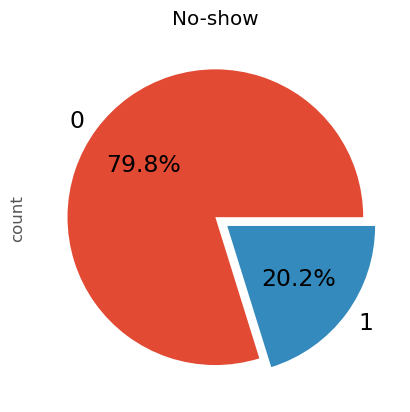

In [28]:
df['No-show'].value_counts().plot(kind = 'pie',
                         autopct = '%1.1f%%',
                         startangle = 0,
                         fontsize = 17,
                         explode = (0, 0.1),
                         title = 'No-show'
)

plt.title('No-show')
plt.show()

* There are about 20% no-show appoinment rate. Its quite high.
* When we build the model, we need to pay attention to the imbalanced data.

### Binary columns

In [29]:
# Convert gender into binary
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})



In [30]:
# check the diabality columns with 5 uniqur values
df.Disability.value_counts()

Disability
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

In [31]:
# Convert 2's, 3's, and 4's to 1's in the Disability column
df['Disability'] = df['Disability'].replace([2, 3, 4], 1)

In [32]:
# confirm binary features
Binary_features = ['Gender', 'MedicaidIND', 'Hypertension', 'Diabetes',
            'Alcoholism', 'Disability', 'SMS_received']
for col in Binary_features:
    print(f'{df[col].value_counts()}' + '\n')


Gender
0    71840
1    38687
Name: count, dtype: int64

MedicaidIND
0    99666
1    10861
Name: count, dtype: int64

Hypertension
0    88726
1    21801
Name: count, dtype: int64

Diabetes
0    102584
1      7943
Name: count, dtype: int64

Alcoholism
0    107167
1      3360
Name: count, dtype: int64

Disability
0    108286
1      2241
Name: count, dtype: int64

SMS_received
0    75045
1    35482
Name: count, dtype: int64



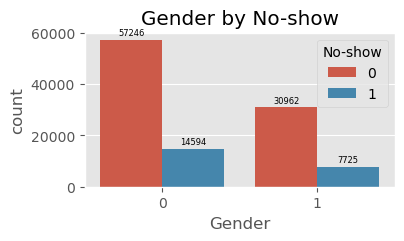

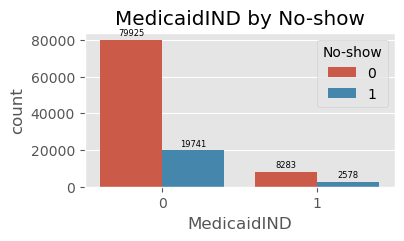

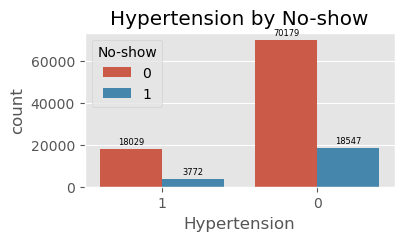

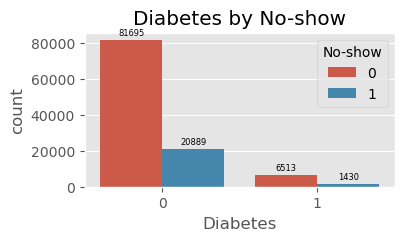

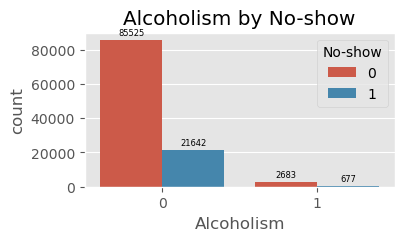

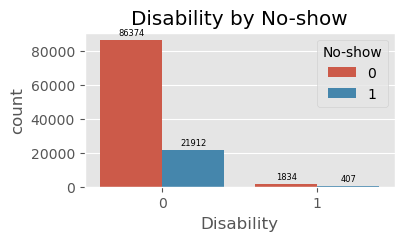

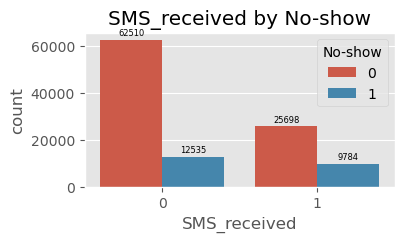

In [33]:

for col in Binary_features:
    plot_counts(df, col, 'No-show',4, 2, 6, show_counts=True)

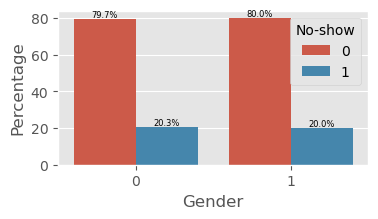

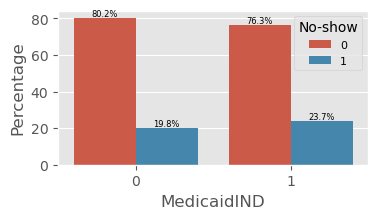

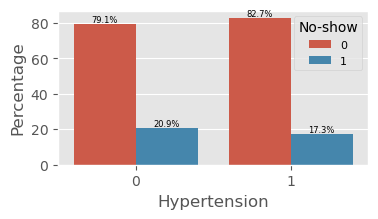

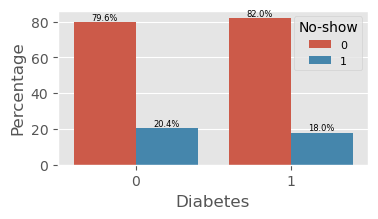

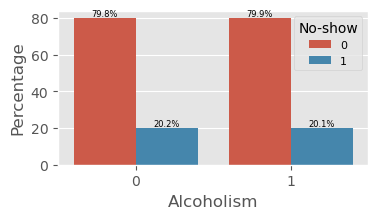

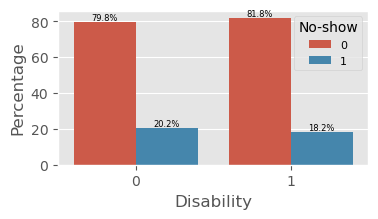

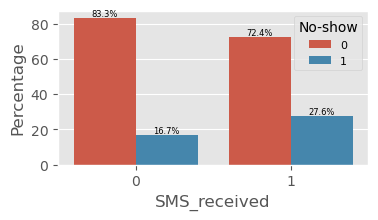

In [34]:
for col in Binary_features:
    plot_normalized_counts(df, col, 'No-show', 4, 2,6, show_percentages=True)

compare to the total precentage of No-show distribution 20.2%
- Medicid patients has higher rate of No-show,  which is 23.7%
- Hypertension patients has lower rate of no-show precentage, which is 17.3%
- Diabetic patients has lower rate of no-show, which is 18%
- SMS_received has higher rate of no-show, which is 27.6%, it dose not make sense, needs to pay attention.
- Diability has lower rate of no-show, which is 18.2%

### Datatime columns

In [35]:
# first, clean the datetime data, first try if parsing works
teststamp = df['ScheduledDay'][0]
pd.to_datetime(teststamp)

Timestamp('2016-04-29 00:00:00')

In [36]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay'].head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: ScheduledDay, dtype: datetime64[ns]

In [37]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.tz_localize(None)
df['AppointmentDay'].head(3)

0   2016-04-29
1   2016-04-29
2   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

In [38]:
# check time span
print(f'first appointment: {df["AppointmentDay"].min()}',
      f'last appointment: {df["AppointmentDay"].max()}')
print(f'first scheduletime: {df["ScheduledDay"].min()}',
      f'last scheduletime: {df["ScheduledDay"].max()}')

first appointment: 2016-04-29 00:00:00 last appointment: 2016-06-08 00:00:00
first scheduletime: 2015-11-10 00:00:00 last scheduletime: 2016-06-08 00:00:00


- the `ScheduledDay` for appointments are ranging from **2015-11-10** to **2016-06-08** and that's around 7 months of data.
- the `AppointmentDay` for appointments are ranging from **2016-04-29** to **2016-06-08** and that's around 1.5 months of data.

- Get Day of the Week for `ScheduledDay` and `AppointmentDay` to see if there are many 'NoShows' over the weekends.
- Week for `ScheduledDay` and `AppointmentDay` also helps us to see if there is a particular pattern where most patients are coming for a visit.

In [39]:
# extract datetime features from time stamps

df['App_weekday'] = df['AppointmentDay'].dt.dayofweek
df['App_dayofmonth'] = df['AppointmentDay'].dt.day


df['Scheduled_dayofmonth'] = df['ScheduledDay'].dt.day
df['Scheduled_weekday'] = df['ScheduledDay'].dt.dayofweek

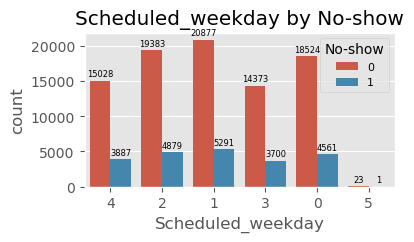

In [40]:
plot_counts(df, 'Scheduled_weekday', 'No-show',4, 2, 6, show_counts=True)

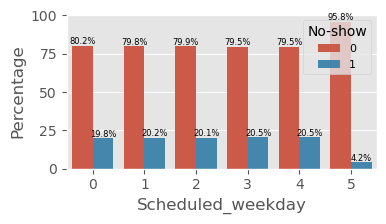

In [41]:
plot_normalized_counts(df, 'Scheduled_weekday', 'No-show', 4, 2,6, show_percentages=True)

It seems Saturday has the least show up rate

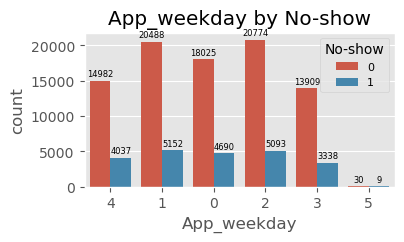

In [42]:
plot_counts(df, 'App_weekday', 'No-show',4, 2, 6, show_counts=True)

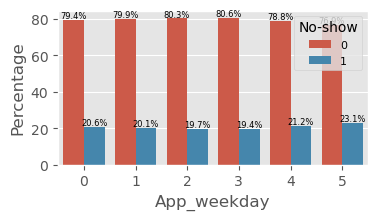

In [43]:
plot_normalized_counts(df, 'App_weekday', 'No-show', 4, 2,6, show_percentages=True)


Saturday has the least apppintmnent, and the no-show rate for clients is a little higher.

In [44]:
# Filter the DataFrame when appointmenet days later then scheduedday
df = df[df['AppointmentDay'] >= df['ScheduledDay']]

# gap days between scheduledays and appointment days, logically, the closer, the more pateint will show up

df['date_gap_days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days



In [45]:
df['date_gap_days'].value_counts()

date_gap_days
0      38563
2       6725
4       5290
1       5213
7       4906
6       4037
5       3277
14      2913
3       2737
8       2332
21      1861
28      1706
13      1682
9       1605
15      1503
10      1391
20      1187
22      1173
16      1151
12      1115
17      1107
29      1089
19      1044
18      1021
27      1013
11       987
35       963
23       822
34       808
26       731
30       704
31       672
33       664
25       637
24       622
32       586
36       551
42       417
41       342
37       331
43       254
40       254
49       216
56       203
63       200
38       199
62       193
50       182
39       170
66       162
44       157
45       137
61       135
46       121
48       117
70       112
58       110
55       109
47       109
69       105
57        98
65        97
53        96
51        91
59        90
52        90
64        75
60        73
54        73
75        72
68        70
76        65
67        63
90        58
91        56
84        5

In [46]:
df['date_gap_days'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: date_gap_days, dtype: float64

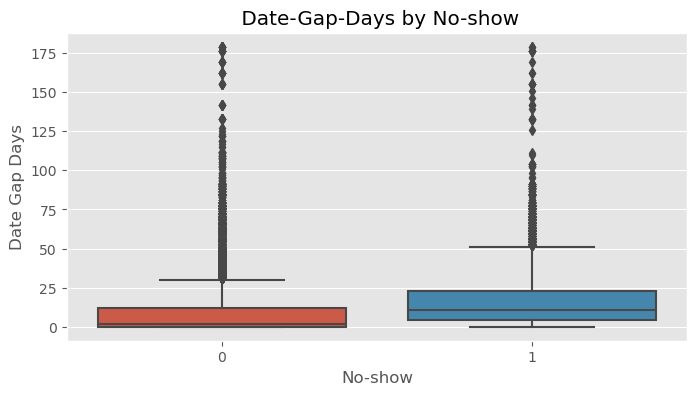

In [47]:
# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='No-show', y='date_gap_days')
plt.title(' Date-Gap-Days by No-show')
plt.xlabel('No-show')
plt.ylabel('Date Gap Days')
plt.show()

- No-show group have higher mean value of gap date, which make sense.
- longer gap date is easier to let people forget the appointment.
- whats the best gap days for hospital to make the schedule?

In [48]:
description_by_no_show = df.groupby('No-show')['date_gap_days'].describe()
print(description_by_no_show)

           count       mean        std  min  25%   50%   75%    max
No-show                                                            
0        88208.0   8.754659  14.550398  0.0  0.0   2.0  12.0  179.0
1        22314.0  15.835484  16.605600  0.0  4.0  11.0  23.0  179.0


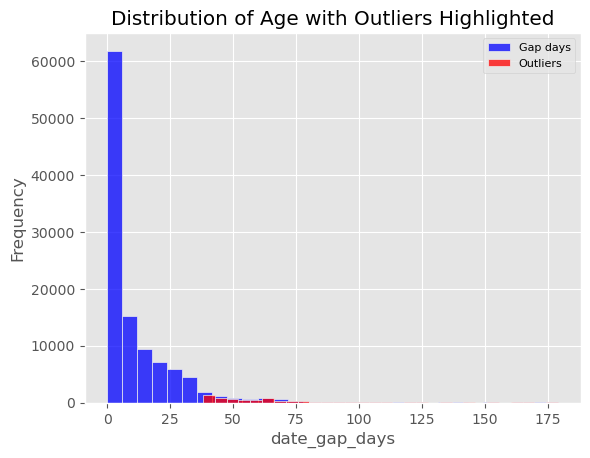

Outliers in the date_gap_days column:
59064    38
2637     38
2635     38
Name: date_gap_days, dtype: int64


In [49]:
# Address the outliers using Tukey Rule

Q1 = df['date_gap_days'].quantile(0.25)
Q3 = df['date_gap_days'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['date_gap_days'] < lower_bound) | (df['date_gap_days'] > upper_bound)]

# Plot a box plot to visualize outliers in the Age column

sns.histplot(df['date_gap_days'], bins=30, kde=False, color='blue', label='Gap days')
sns.histplot(outliers['date_gap_days'], bins=30, kde=False, color='red', label='Outliers')
plt.xlabel('date_gap_days')
plt.ylabel('Frequency')
plt.title('Distribution of Age with Outliers Highlighted')
plt.legend()
plt.show()

print("Outliers in the date_gap_days column:")
print(outliers['date_gap_days'].sort_values().head(3))

In [50]:
# lets remove the outliers from the date-gap-days columns, check the data information in each No-show distribution
df_without_outliers = df[(df['date_gap_days'] >= lower_bound) & (df['date_gap_days'] <= upper_bound)]

In [51]:
description_by_no_show = df_without_outliers.groupby('No-show')['date_gap_days'].describe()
print(description_by_no_show)

           count       mean        std  min  25%  50%   75%   max
No-show                                                          
0        84263.0   6.471915   9.383027  0.0  0.0  2.0   9.0  37.0
1        20456.0  12.196813  10.501871  0.0  3.0  8.0  20.0  37.0


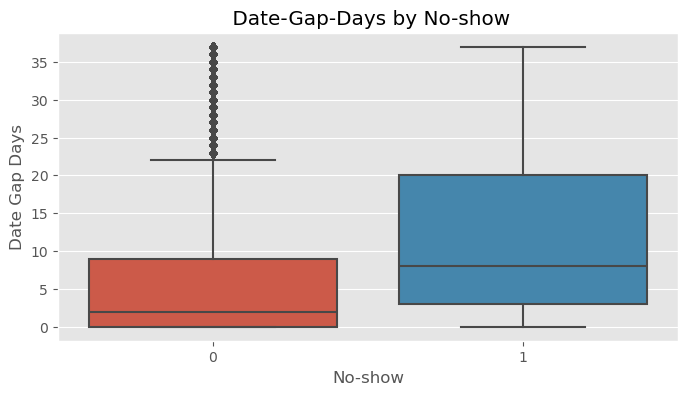

In [52]:
# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_without_outliers, x='No-show', y='date_gap_days')
plt.title(' Date-Gap-Days by No-show')
plt.xlabel('No-show')
plt.ylabel('Date Gap Days')
plt.show()

- For no-shows, 25% of appointments had a gap of 3 days or less, and 75% had a gap of 20 days or less.
- For shows, 25% had a gap of 0 days or less, and 75% had a gap of 9 days or less.
- Conclusion:
Based on the statistics, shorter appointment gap days are associated with higher attendance rates. Patients are more likely to show up for appointments scheduled closer to the scheduling date. 
idea scedule date should be 2 days?

In [53]:
df.head(3)

PatientID Gender ScheduledDay AppointmentDay  Age  LocationID  \
0   #29872499824296      0   2016-04-29     2016-04-29   62          40   
1  #558997776694438      1   2016-04-29     2016-04-29   56          40   
2    #4262962299951      0   2016-04-29     2016-04-29   62          47   

  MedicaidIND Hypertension Diabetes Alcoholism Disability SMS_received  \
0           0            1        0          0          0            0   
1           0            0        0          0          0            0   
2           0            0        0          0          0            0   

  No-show App_weekday  App_dayofmonth  Scheduled_dayofmonth Scheduled_weekday  \
0       0           4              29                    29                 4   
1       0           4              29                    29                 4   
2       0           4              29                    29                 4   

   date_gap_days  
0              0  
1              0  
2              0

### Age

In [54]:
# age is the only numerical data at this point. lets check the age and also related to the target
df['Age'].describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

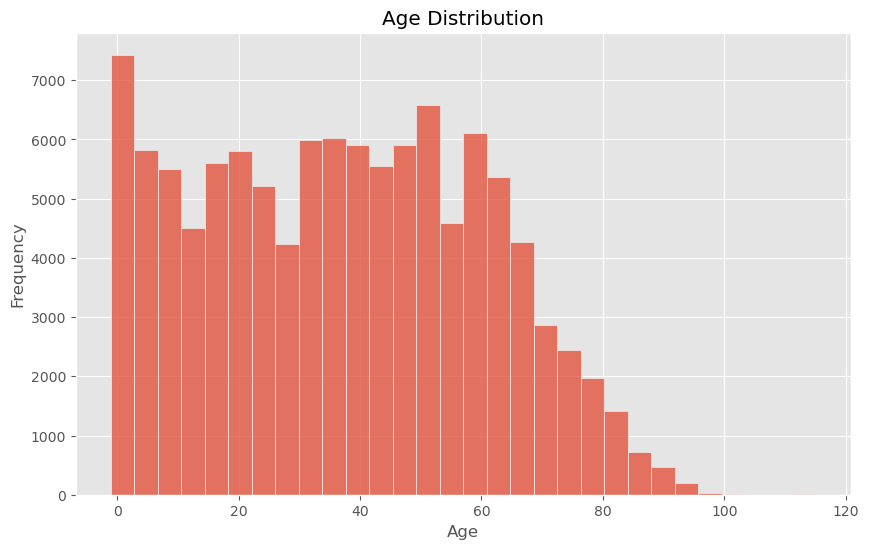

In [55]:
# Plot the distribution of Age using a seaborn histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [56]:
df['Age'].skew()

0.12160883674822755

* There is a -1 age, which dose not makesense, lets drop it!
* Average age is 37 and  a great amount of pateints age 0, they maybe are babies.
* the max age is 115, are they outliers? let's look into it.


In [57]:
df = df[df.Age >= 0]

In [58]:
print("Patients with `Age` less than -1 -> {}".format(df[df.Age == -1].shape[0]))
print("Patients with `Age` equal to 0 -> {}".format(df[df.Age == 0].shape[0]))

Patients with `Age` less than -1 -> 0
Patients with `Age` equal to 0 -> 3539


* As we have 3539 patients with `Age` equal to 0 we are assuming that these are the small babies with few months of Age. 
Usually as babies doesn't have `Hypertension` or `Diabetes` or `Alcoholism` we will check these features for the above records to see if our assumption is correct.

In [59]:
df[(df.Age <= 0) & ((df.Hypertension.astype(int) == 1) | (df.Diabetes.astype(int) == 1) | (df.Alcoholism.astype(int) == 1))]

Empty DataFrame
Columns: [PatientID, Gender, ScheduledDay, AppointmentDay, Age, LocationID, MedicaidIND, Hypertension, Diabetes, Alcoholism, Disability, SMS_received, No-show, App_weekday, App_dayofmonth, Scheduled_dayofmonth, Scheduled_weekday, date_gap_days]
Index: []

As we have no records above, we will confirm our conclusion that `Age` value of 0 indeed represents babies who are just few months old.

In [60]:
# Print Unique Values for 'Age'
print("Unique Values in `Age` => {}".format(np.sort(df.Age.unique())))

Unique Values in `Age` => [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 102 115]


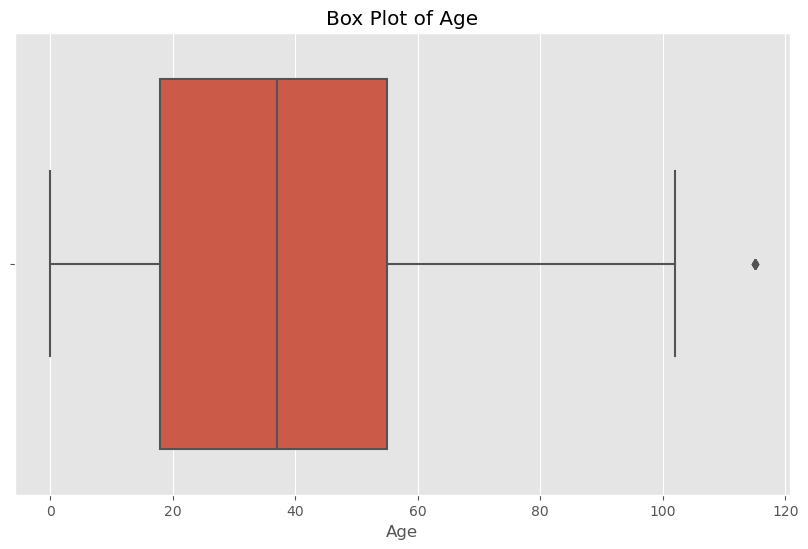

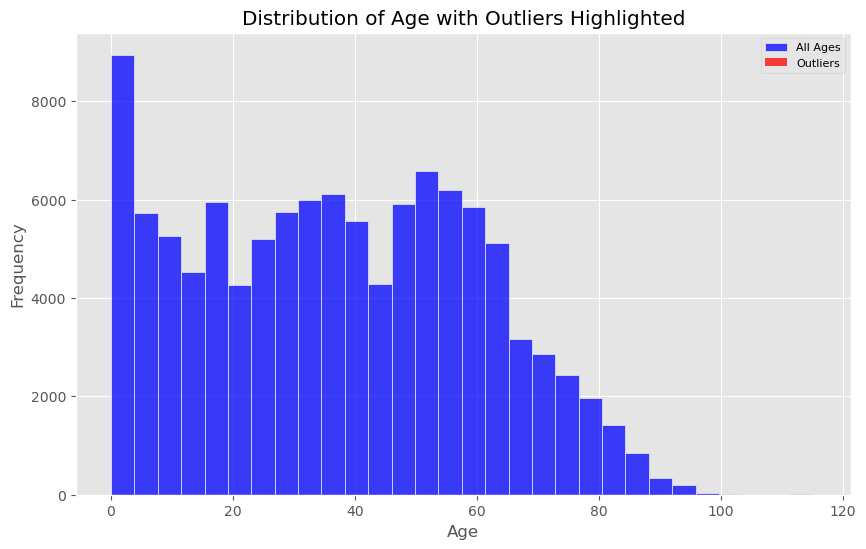

Outliers in the Age column:
63912    115
63915    115
68127    115
76284    115
97666    115
Name: Age, dtype: int64


In [61]:
# Address the outliers using Tukey Rule

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# Plot a box plot to visualize outliers in the Age column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Plot the distribution of Age with outliers highlighted
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=False, color='blue', label='All Ages')
sns.histplot(outliers['Age'], bins=30, kde=False, color='red', label='Outliers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age with Outliers Highlighted')
plt.legend()
plt.show()

print("Outliers in the Age column:")
print(outliers['Age'].sort_values())

In [62]:
# check the outlier patients information
df[(df.Age >= 115) & ((df.Hypertension.astype(int) == 1) | (df.Diabetes.astype(int) == 1) | (df.Alcoholism.astype(int) | (df.Disability.astype(int) == 1) == 1))]

PatientID Gender ScheduledDay AppointmentDay  Age  LocationID  \
63912   #31963211613981      0   2016-05-16     2016-05-19  115           2   
63915   #31963211613981      0   2016-05-16     2016-05-19  115           2   
68127   #31963211613981      0   2016-04-08     2016-05-16  115           2   
76284   #31963211613981      0   2016-05-30     2016-05-30  115           2   
97666  #748234579244724      0   2016-05-19     2016-06-03  115          64   

      MedicaidIND Hypertension Diabetes Alcoholism Disability SMS_received  \
63912           0            0        0          0          1            0   
63915           0            0        0          0          1            0   
68127           0            0        0          0          1            0   
76284           0            0        0          0          1            0   
97666           0            1        0          0          0            1   

      No-show App_weekday  App_dayofmonth  Scheduled_dayofmonth  \
63912       1           3              19                    16   
63915       1           3              19                    16   
68127       1           0              16                     8   
76284       0           0              30                    30   
97666       0           4               3                    19   

      Scheduled_weekday  date_gap_days  
63912                 0              3  
63915                 0              3  
68127                 4             38  
76284                 0              0  
97666                 3             15

- It seems the outlier pateints who are 115 year old are two real patients.
- what about the age group?

- A minor 15 years of age or older may give consent to hospital care, medical or surgical diagnosis or treatment by a physician, dentist, physician assistant, or nurse practitioner without the consent of a parent or guardian of the minor.

- Accoding to this research article (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC11000702/)
- Adult Development and Associated Health Risks
Emerging adulthood (18–29 years),
Young and middle adulthood (30–45 years),
Middle to late adulthood (40–65 years),
In post-retirement (66–89 years),
Very old age (≥90 years),



- Lets distribute the age into kids (0-18), young adults(19-45),  late adulthood (46–65 years),senior(66-89) and very old(>=90) groups 1,2,3,4,5


In [63]:
# Define age bins and labels
bins = [0,19, 46, 66, 90, float('inf')]
labels = [1, 2, 3, 4,5]

# Categorize the Age column into groups and label them 1-5
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify the transformation
print(df[['Age', 'Age_Group']])

# Display the counts of each age group
print(df['Age_Group'].value_counts())

        Age Age_Group
0        62         3
1        56         3
2        62         3
3         8         1
4        56         3
5        76         4
6        23         2
7        39         2
8        21         2
9        19         2
10       30         2
11       29         2
12       22         2
13       28         2
14       54         3
15       15         1
16       50         3
17       40         2
18       30         2
19       46         3
20       30         2
21        4         1
22       13         1
23       46         3
24       65         3
25       46         3
26       45         2
27        4         1
28       51         3
29       32         2
30       46         3
31       12         1
32       61         3
33       38         2
34       79         4
35       18         1
36       63         3
37       64         3
38       85         4
39       59         3
40       55         3
41       71         4
42       50         3
43       49         3
44       7

In [64]:
df['Age_Group'].value_counts().sort_index()

Age_Group
1    28865
2    38716
3    29640
4    12883
5      417
Name: count, dtype: int64

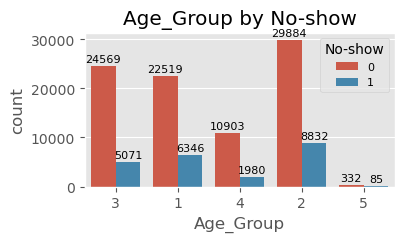

In [65]:
plot_counts(df, 'Age_Group', 'No-show', 4, 2, 8, show_counts=True)

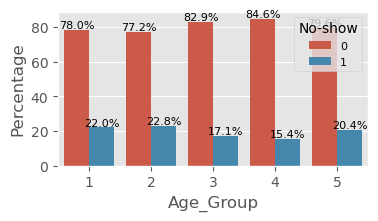

In [66]:
plot_normalized_counts(df, 'Age_Group', 'No-show', 4, 2, 8, show_percentages=True)


* group 3 (age 46-66),  17.1 % miss their appointments.
* group 4 (age 66-89), 15.4% miss their appointments.
* group 1 and 2, which are age (0-45), 22% miss their appointments.
- make sense. 

very old pateints need more attention to remind or help to the appointments, maybe need help cuase the inconvenient

senior patients, usally have more serious diseases, they are more intend to visit the doctors.

young adults or young parents who need to take care of kids are the majority, they are busy and easy to forget the appointment



In [67]:
# we can merge the group1 and 2 together
bins = [0, 46, 66, 90, float('inf')]
labels = [1, 2, 3, 4]

# Categorize the Age column into groups and label them 1-5
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify the transformation
print(df[['Age', 'Age_Group']])

# Display the counts of each age group
print(df['Age_Group'].value_counts())


        Age Age_Group
0        62         2
1        56         2
2        62         2
3         8         1
4        56         2
5        76         3
6        23         1
7        39         1
8        21         1
9        19         1
10       30         1
11       29         1
12       22         1
13       28         1
14       54         2
15       15         1
16       50         2
17       40         1
18       30         1
19       46         2
20       30         1
21        4         1
22       13         1
23       46         2
24       65         2
25       46         2
26       45         1
27        4         1
28       51         2
29       32         1
30       46         2
31       12         1
32       61         2
33       38         1
34       79         3
35       18         1
36       63         2
37       64         2
38       85         3
39       59         2
40       55         2
41       71         3
42       50         2
43       49         2
44       7

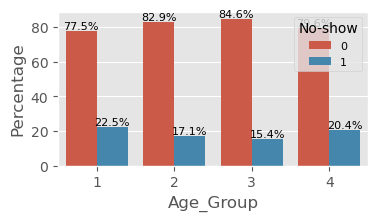

In [68]:
plot_normalized_counts(df, 'Age_Group', 'No-show', 4, 2, 8, show_percentages=True)

Is different group of patients are thre reason for bad response to SMS? older people may not use to resonse the messages

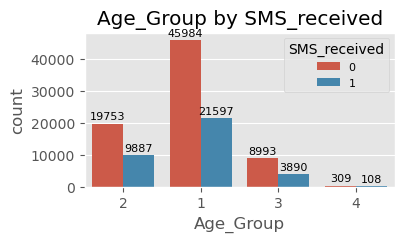

In [69]:
#Lets find out the SMS rate resceid rate in each group, check whether age is one of the reason that sms_receiced has higher missing rate
plot_counts(df, 'Age_Group', 'SMS_received', 4, 2, 8, show_counts=True)

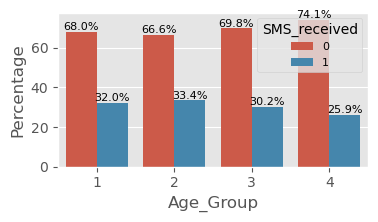

In [70]:
plot_normalized_counts(df, 'Age_Group', 'SMS_received', 4, 2, 8, show_percentages=True)

- very old people has lower SMS received rate, but they show up rate is 20%, which is similar as the whole group of peopele.
- other groups have similer receiving SMS rate, but younger adults have higher rate of missing the appointment.
- SMS may not have strong indicator for no-show predicting, maybe something in the SMS or SMS sent time can be improved to help.
- with the aging increasing, especially when people get into 66-99, they have more time casue retired, and also have more chronic diseases,they are more tend to go to the doctors

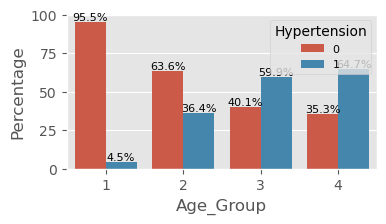

In [71]:
plot_normalized_counts(df, 'Age_Group', 'Hypertension', 4, 2, 8, show_percentages=True)

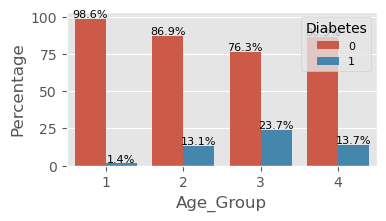

In [72]:
plot_normalized_counts(df, 'Age_Group', 'Diabetes', 4, 2, 8, show_percentages=True)

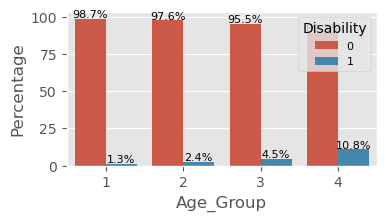

In [73]:
plot_normalized_counts(df, 'Age_Group', 'Disability', 4, 2, 8, show_percentages=True)

- Young and young adults has less chrnic diseases, like hypertension, diabetes and dialibity


### LocationID

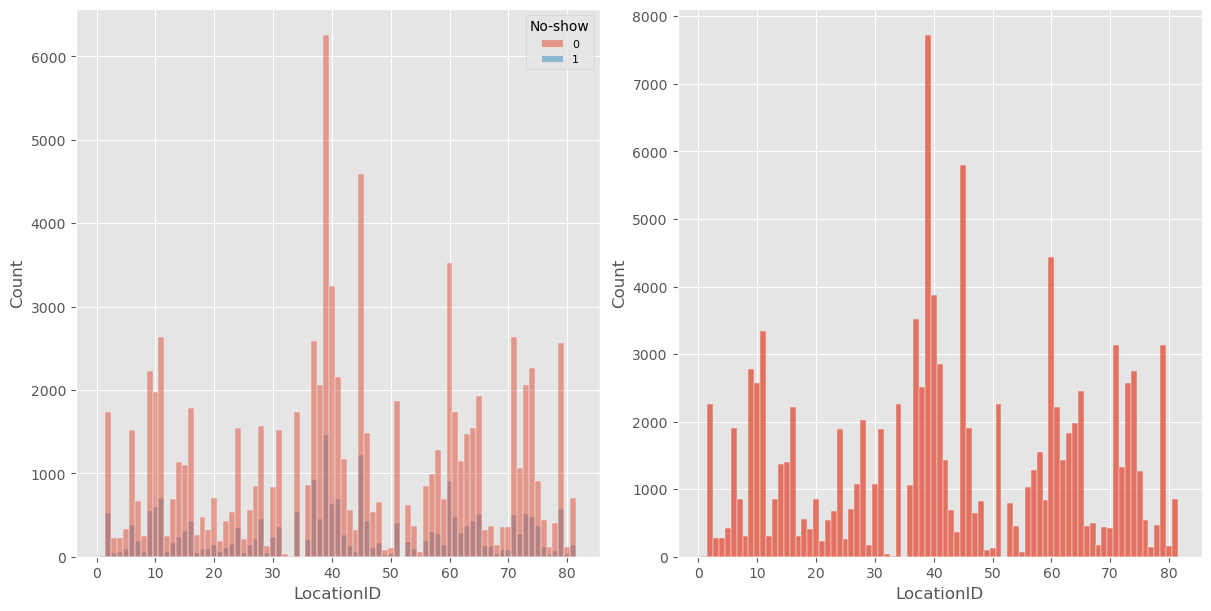

In [74]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6), layout = 'constrained')
sns.histplot(df, x = 'LocationID', hue = 'No-show', ax = axes[0], discrete = True)
sns.histplot(df, x = 'LocationID', ax = axes[1], discrete = True)
plt.show()

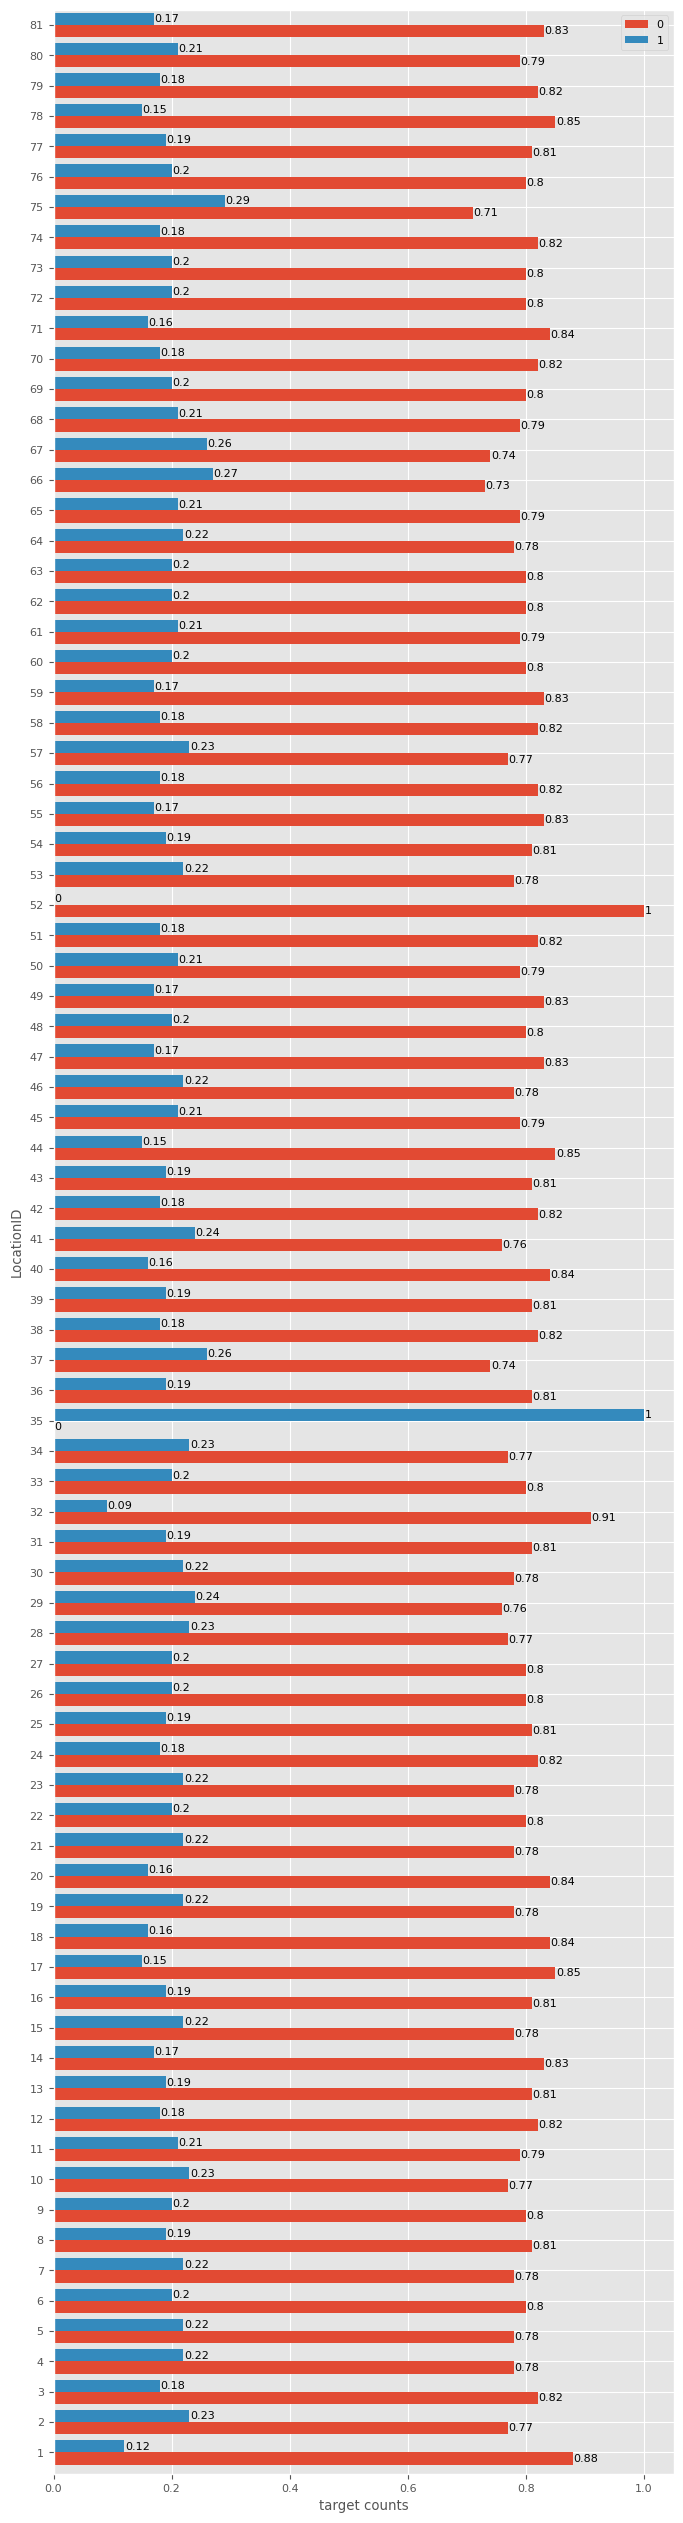

In [75]:
def target_barhplot(df, col, target, ax = None, height = 0.25, normalized = False):

    if ax == None:
        fig, ax = plt.subplots()

    if normalized:
        grouped_data = (df.groupby(col)[target]
                        .value_counts(normalize = True)
                        .apply(lambda x: round(x, 2))
                        .rename('target_counts'))
    else:
        grouped_data = df.groupby(col)[target].value_counts().rename('target_counts')
    categories = grouped_data.index.get_level_values(0).unique()
    target_values = grouped_data.index.get_level_values(1).unique()

      # Define the data dictionary
    data = {j: [] for j in target_values}

    for j in target_values:
        data[j] = []
        for i in categories:
            try:
                data[j].append(grouped_data.loc[(i, j)])
            except KeyError:
                data[j].append(0)
    #data = {j: [grouped_data.loc[(i, j)] for i in categories] for j in target_values}

    y = np.arange(len(categories))
    offsetter = 0
    for label, values in data.items():
        rects = ax.barh(y + offsetter*height, values, height = height, label = label)
        ax.bar_label(rects, padding = 0.3)
        offsetter += 1
    ax.set_yticks(y + (len(data)-1)/2*height, labels = categories)
    ax.set_xlabel('target counts')
    ax.set_ylabel(col)
    ax.legend()
    return ax

with plt.rc_context({'font.size': 8}):
    fig, ax = plt.subplots(figsize = (8, 32))
    target_barhplot(df, 'LocationID', 'No-show', ax = ax, normalized=True, height = 0.4)
    ax.set_ylim(ax.patches[0].get_y()-0.3, ax.patches[-1].get_y()+0.5)
    plt.show()

- From the above visualization looks like the ratio of Show to No-Show is almost the same for all LocationID.
- There is not enough information about the locationID, it might be the location of clinics that petients make the appintments.
- transportation, wheather, the distances of patients home address to clinics could give more informations to predict whether this patients show up to the appointments.

<a id='Data_Quality'></a>
<h2 style="color:yellow">Multivariate Analysis</h2>

In [76]:
df.columns.to_list()

['PatientID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'LocationID',
 'MedicaidIND',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Disability',
 'SMS_received',
 'No-show',
 'App_weekday',
 'App_dayofmonth',
 'Scheduled_dayofmonth',
 'Scheduled_weekday',
 'date_gap_days',
 'Age_Group']

In [77]:
# use phik to analyize feature correlations. since it can handle numerical and catagorical features
!pip install phik
import phik
unused_features = ['PatientID', 'AppointmentDay', 'ScheduledDay']
full_features = [x for x in df.columns.to_list() if x not in unused_features]
interval_features = ['Age', 'date_gap_days']
categorical_features = [x for x in full_features if x not in interval_features]
phik_overview = df[full_features].phik_matrix(interval_cols = interval_features)

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


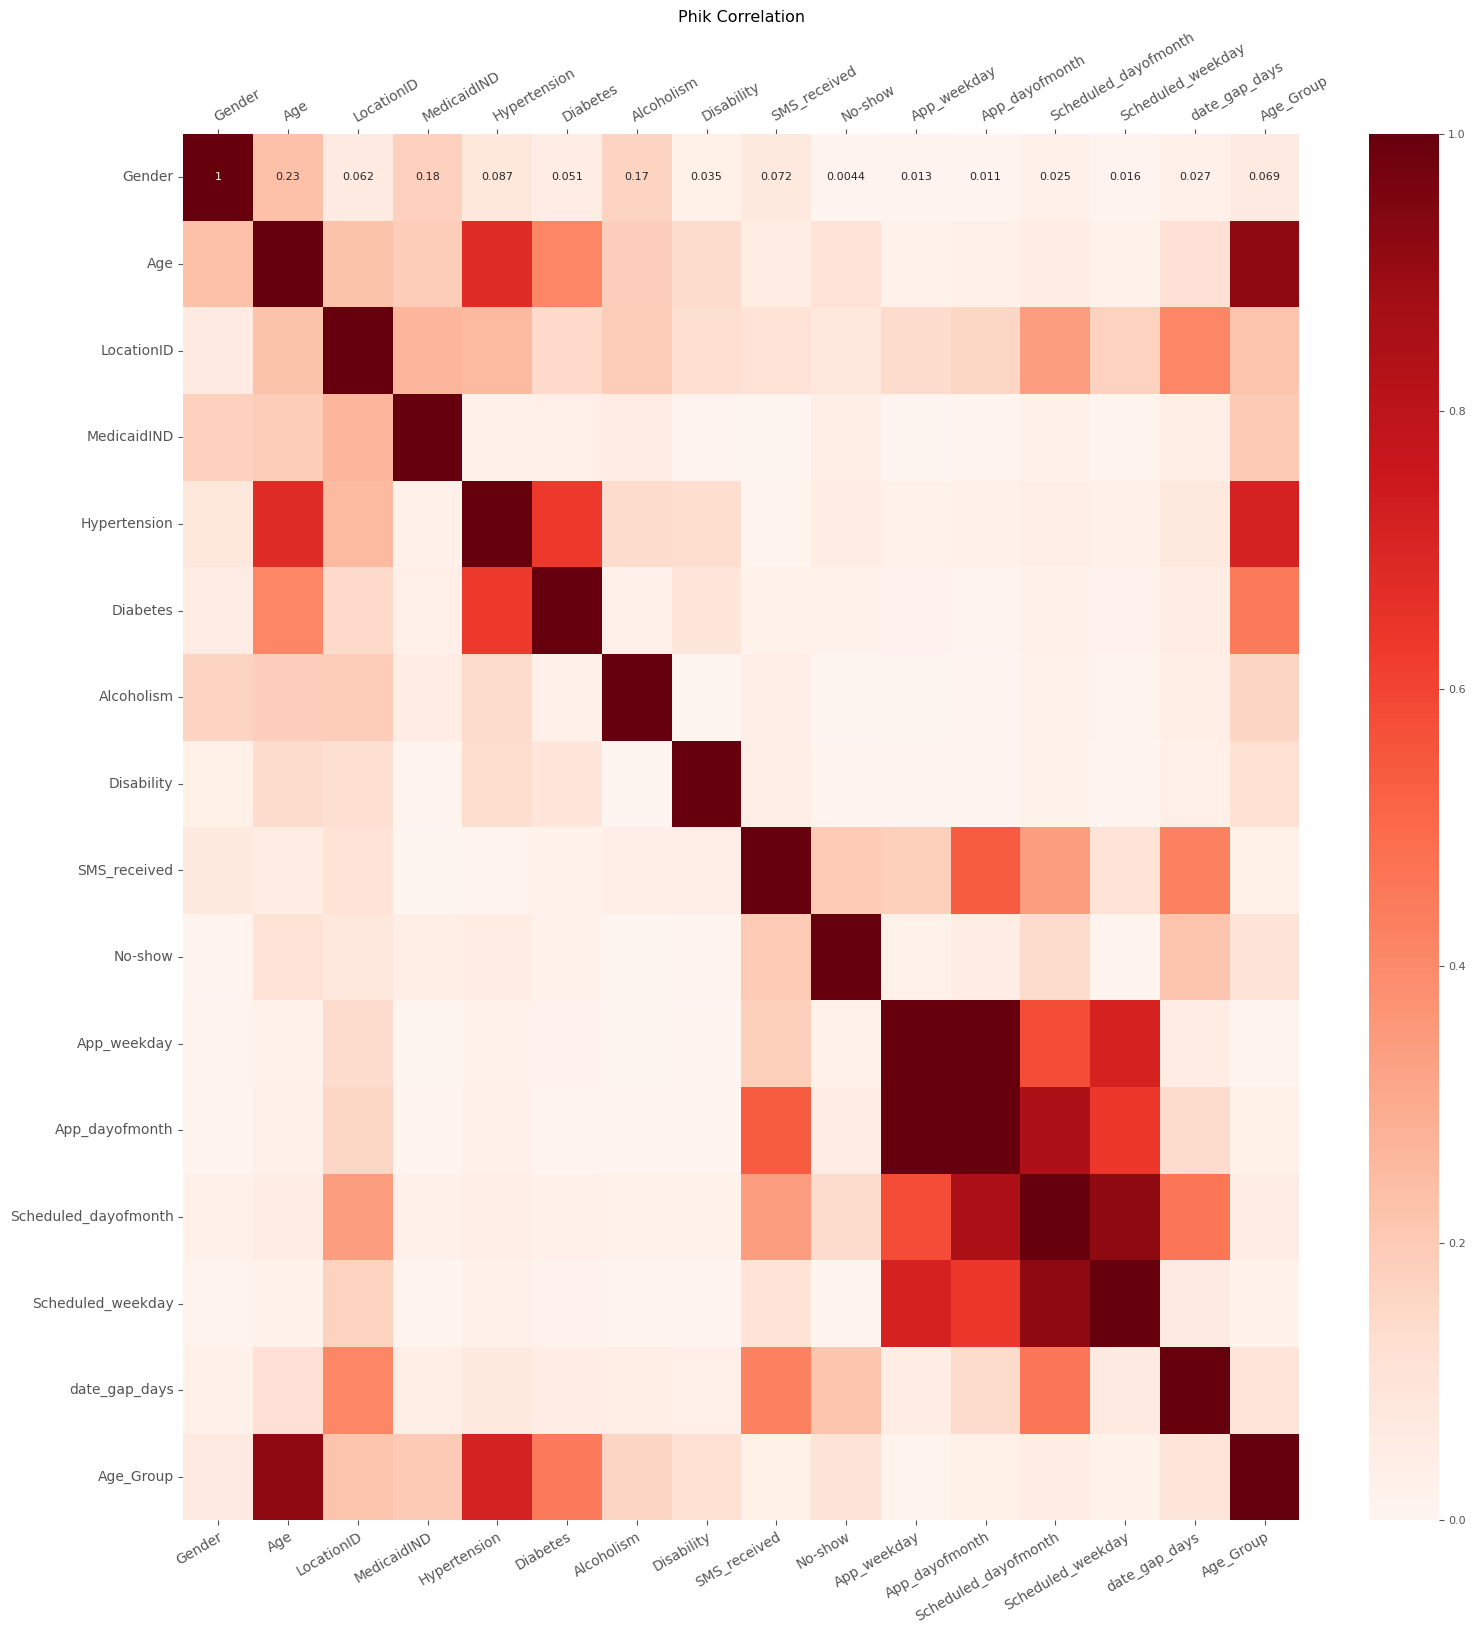

In [78]:
fig, ax = plt.subplots(figsize = (18, 18))
with plt.rc_context({'font.size': 8}):
    sns.heatmap(phik_overview, annot=True, cmap = plt.cm.Reds, ax = ax)
    ax.set_title('Phik Correlation')
    ax.xaxis.set_tick_params(top = True, labeltop = True, labelrotation = 30)
    plt.setp(ax.get_xticklabels()[len(full_features):], ha = 'left', rotation_mode = 'anchor')
    plt.setp(ax.get_xticklabels()[:len(full_features)], ha = 'right', rotation_mode = 'anchor')
plt.show()



In [79]:
# Set a threshold for high correlation
high_correlation_threshold = 0.8

# Find pairs of features with high correlation
high_correlation_pairs = []
for i in range(len(phik_overview.columns)):
    for j in range(i):
        if abs(phik_overview.iloc[i, j]) > high_correlation_threshold:
            high_correlation_pairs.append((phik_overview.columns[i], phik_overview.columns[j], phik_overview.iloc[i, j]))

# Display high correlation pairs
print("Pairs of features with high PhiK correlation (threshold = 0.8):")
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

Pairs of features with high PhiK correlation (threshold = 0.8):
App_dayofmonth and App_weekday: 1.00
Scheduled_dayofmonth and App_dayofmonth: 0.85
Scheduled_weekday and Scheduled_dayofmonth: 0.92
Age_Group and Age: 0.92


keep only one of those highly correlated columns

In [80]:
df = df.drop(['PatientID', 'AppointmentDay', 'ScheduledDay', 'App_dayofmonth','Scheduled_dayofmonth','Age_Group','Scheduled_weekday','App_weekday'],axis=1, inplace = False)

In [81]:
df.columns.to_list()

['Gender',
 'Age',
 'LocationID',
 'MedicaidIND',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Disability',
 'SMS_received',
 'No-show',
 'date_gap_days']

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110521 non-null  object
 1   Age            110521 non-null  int64 
 2   LocationID     110521 non-null  int64 
 3   MedicaidIND    110521 non-null  object
 4   Hypertension   110521 non-null  object
 5   Diabetes       110521 non-null  object
 6   Alcoholism     110521 non-null  object
 7   Disability     110521 non-null  object
 8   SMS_received   110521 non-null  object
 9   No-show        110521 non-null  object
 10  date_gap_days  110521 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 10.1+ MB


In [83]:
# Convert object columns to int where possible
for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = df[col].astype(int)
    except ValueError:
        # If conversion fails, the column remains unchanged
        pass

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Gender         110521 non-null  int32
 1   Age            110521 non-null  int64
 2   LocationID     110521 non-null  int64
 3   MedicaidIND    110521 non-null  int32
 4   Hypertension   110521 non-null  int32
 5   Diabetes       110521 non-null  int32
 6   Alcoholism     110521 non-null  int32
 7   Disability     110521 non-null  int32
 8   SMS_received   110521 non-null  int32
 9   No-show        110521 non-null  int32
 10  date_gap_days  110521 non-null  int64
dtypes: int32(8), int64(3)
memory usage: 6.7 MB


<a id="4"></a>
<h1 style="background-color:orange;font-family:monospace;font-size:250%;text-align:center">Modelling</h1>

In [85]:
# Models
from sklearn.model_selection import KFold,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import warnings

In [86]:
# Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import auc, roc_curve, f1_score, accuracy_score, recall_score, precision_score

## A function for model evaluation

In [87]:
# A function for model evaluation
def report_loss_cf(name, model, X_train, y_train, X_test, y_test, graph = 0):

    print('Model performance for: ', name)

    def calculate_loss(model, X, y):
        pred = model.predict(X)
        pred_proba = model.predict_proba(X)

        accuracy = accuracy_score(y, pred)
        precision = precision_score(y, pred, average='weighted')
        recall = recall_score(y, pred, average='weighted')
        f1 = f1_score(y, pred, average='weighted')
        auc = roc_auc_score(y, pred_proba[:,1])
        fpr, tpr, _ = roc_curve(y, pred_proba[:,1])
        return pred, accuracy, precision, recall, f1, auc, fpr, tpr

    y_train_pred, accuracy_train, precision_train, recall_train, f1_train, auc_train, fpr_train, tpr_train = calculate_loss(
        model, X_train, y_train)
    print(f'train set accuracy: {accuracy_train:.3f}')
    print(f'train set precision: {precision_train:.3f}')
    print(f'train set recall: {recall_train:.3f}')
    print(f'train set f1 score: {f1_train:.3f}')
    print(f'training set AUC score: {auc_train:.3f}')
    print()

    y_test_pred, accuracy_test, precision_test, recall_test, f1_test, auc_test, fpr_test, tpr_test = calculate_loss(
        model, X_test, y_test)
    print(f'test set accuracy: {accuracy_test:.3f}')
    print(f'test set precision: {precision_test:.3f}')
    print(f'test set recall: {recall_test:.3f}')
    print(f'test set f1 score: {f1_test:.3f}')
    print(f'test set AUC score: {auc_test:.3f}')

    if graph == 0:
        return

    elif graph == 1:

        fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (7, 3))
        cm_train = confusion_matrix(y_train, y_train_pred)
        cm_test = confusion_matrix(y_test, y_test_pred)

        sns.heatmap(cm_train, annot = True, cmap = "Blues", fmt = 'g', ax = ax1)
        ax1.set_title('train set')
        ax1.set_xlabel('Predicted labl')
        ax1.set_ylabel('True label')
        ax1.xaxis.set_ticklabels(['0', '1'])
        ax1.yaxis.set_ticklabels(['0', '1'])

        sns.heatmap(cm_test, annot = True, cmap = "Blues", fmt = 'g', ax = ax2)
        ax2.set_title('test set')
        ax2.set_xlabel('Predicted labl')
        ax2.set_ylabel('True label')
        ax2.xaxis.set_ticklabels(['0', '1'])
        ax2.yaxis.set_ticklabels(['0', '1'])
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize = (5,3))
        plt.plot([0,1], [0,1], linestyle = '--', label = 'random')
        plt.plot(fpr_train, tpr_train,label = "Train_AUC=" + str(auc_train.round(3)))
        plt.plot(fpr_test,tpr_test,label = "Test_AUC=" + str(auc_test.round(3)))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc = 4)
        plt.tight_layout()
        plt.show()


## Model building

In [88]:

df.reset_index(drop=True, inplace=True)

target = 'No-show'

features = df.columns.tolist()
features.remove(target)

# Splitting the DataFrame into features (X) and target (y)
X, y = df[features], df[target]


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

## Logistic Regression

Model performance for:  Logistic Regression
train set accuracy: 0.669
train set precision: 0.754
train set recall: 0.669
train set f1 score: 0.697
training set AUC score: 0.667

test set accuracy: 0.663
test set precision: 0.750
test set recall: 0.663
test set f1 score: 0.692
test set AUC score: 0.664


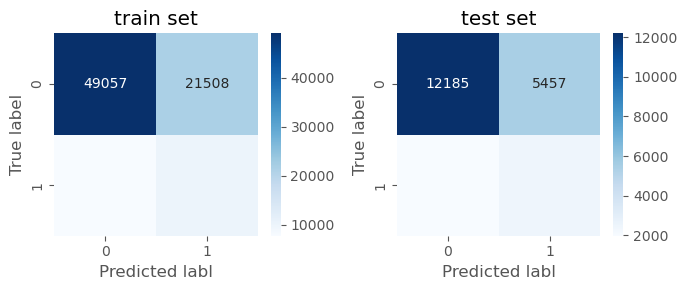

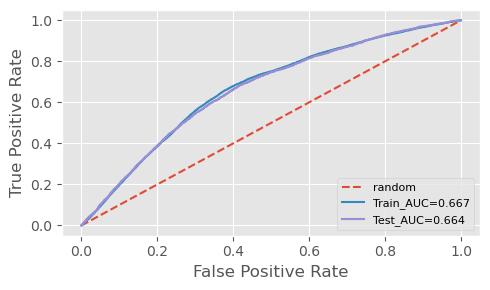

This model train session took 0.040634548664093016minutes.


In [90]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import time


start = time.time()
steps=[("scaler", StandardScaler()),
       ("lr", LogisticRegression(class_weight = 'balanced', random_state=42))]

lg = Pipeline(steps)
model_lg = lg.fit(X_train, y_train)

report_loss_cf('Logistic Regression', model_lg, X_train, y_train, X_test, y_test, graph = 1)

end = time.time()
print(f'This model train session took {(end-start)/60}minutes.')

In [91]:
from sklearn.model_selection import KFold,RandomizedSearchCV, GridSearchCV
param_grid = {
    'lr__penalty': ['l1', 'l2'],
    'lr__C': [0.1, 1.0, 10],
    'lr__solver': ['liblinear', 'saga']
}

# Create a GridSearchCV object with your pipeline model and hyperparameters
steps=[("scaler", StandardScaler()),
       ("lr", LogisticRegression(class_weight = 'balanced', random_state=42, max_iter=10000))]

lg = Pipeline(steps)
grid_search = GridSearchCV(lg, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

# roc_auc: imbalanced dataset, compare models / fine tuning parameters

# precision: accuracy of the true positive, when we predict the patients might not come, we can over schdule? call to remind
# recall: high cost FN, in this case FN is predict no-show, but they actully come. not important here.

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_params

{'lr__C': 0.1, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}

Model performance for:  Logistic Regression
train set accuracy: 0.669
train set precision: 0.754
train set recall: 0.669
train set f1 score: 0.697
training set AUC score: 0.667

test set accuracy: 0.664
test set precision: 0.750
test set recall: 0.664
test set f1 score: 0.692
test set AUC score: 0.664


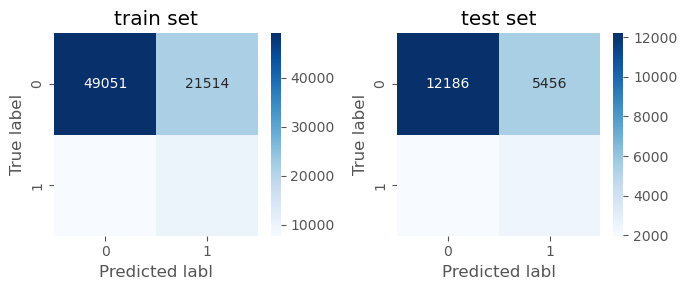

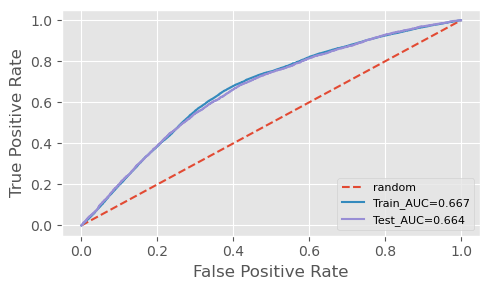

In [92]:
steps=[("scaler", StandardScaler()),
       ("lr", LogisticRegression(class_weight = 'balanced', C= 0.1, penalty= 'l1', solver='liblinear', random_state=42))]

lg = Pipeline(steps)
model_lg = lg.fit(X_train, y_train)

report_loss_cf('Logistic Regression', model_lg, X_train, y_train, X_test, y_test, graph = 1)

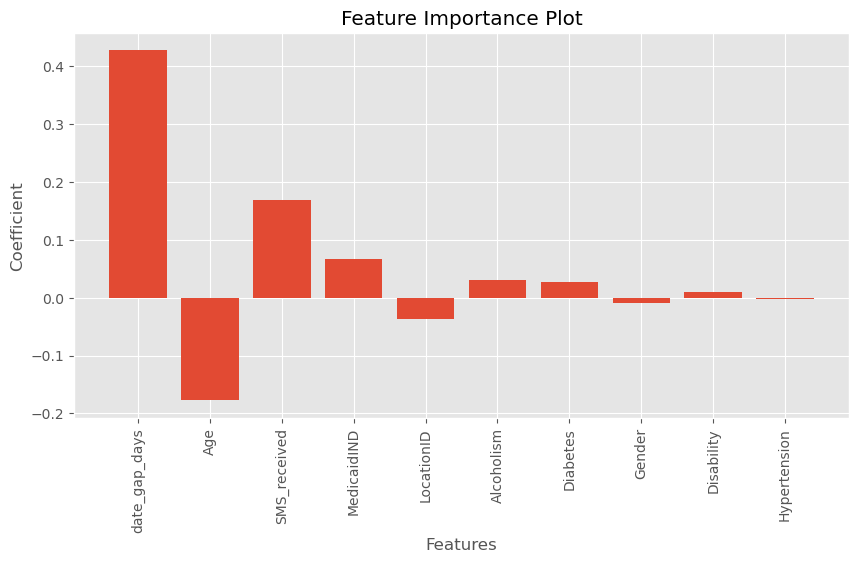

In [93]:
coef = model_lg.named_steps['lr'].coef_[0]
features = X.columns.tolist()
coef_dict = dict(zip(features, coef))
# sort the features based on their absolute coefficient values
sorted_coef_dict = dict(sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True))

# plot the feature importance as a bar chart
plt.figure(figsize=(10,5))
plt.bar(sorted_coef_dict.keys(), sorted_coef_dict.values())
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importance Plot')
plt.show()

- LogisticRegression is simple and fast,interpretable. However, the performance of this model is not good. even we use GridSearchCV did the hyperperameter tuning.
- We still can take a hint about the feature importance.
the top three predictor are: date_gap_days, Age, SMS_received(Negative predictor!)


## Random Forest

Model performance for:  Random Forest
train set accuracy: 0.960
train set precision: 0.962
train set recall: 0.960
train set f1 score: 0.960
training set AUC score: 0.991

test set accuracy: 0.759
test set precision: 0.730
test set recall: 0.759
test set f1 score: 0.742
test set AUC score: 0.696


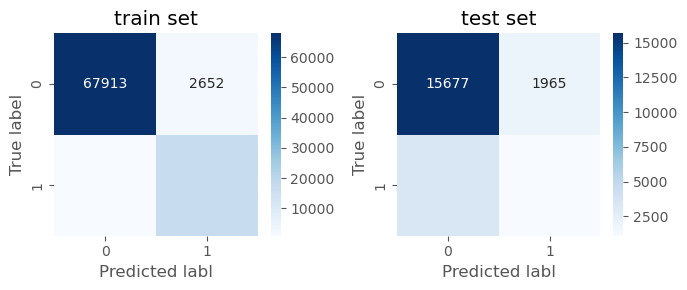

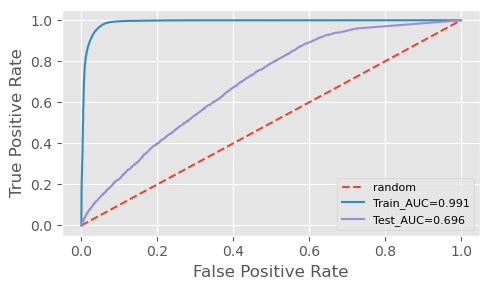

In [94]:
from sklearn.ensemble import RandomForestClassifier
steps=[("scaler", StandardScaler()),
       ("rfc", RandomForestClassifier(class_weight = 'balanced',random_state = 42))]

rf = Pipeline(steps)
model_rf = rf.fit(X_train, y_train)

report_loss_cf('Random Forest', model_rf, X_train, y_train, X_test, y_test, graph = 1)

-Random Forest is very easy to overfiting. 

In [95]:
steps = [("scaler", StandardScaler()),
         ("Ensemble", RandomForestClassifier(class_weight='balanced',random_state = 42))]

model = Pipeline(steps)

params = {'Ensemble__n_estimators' : np.arange(20,110,10),
          'Ensemble__max_depth': np.arange(2,12,2),
          'Ensemble__min_samples_split' : [2,4,6,8,10,20,40,60],
          'Ensemble__min_samples_leaf' : [1,5,10,20],
          'Ensemble__max_features': ['sqrt', 'log2'],
          'Ensemble__bootstrap' : [True, False]
         }

rs = RandomizedSearchCV(model,
                        params,
                        n_iter=50,
                        cv=5,
                        n_jobs=-1,
                        scoring='roc_auc')

rs.fit(X_train, y_train)

# print out the top 5 (include training score) to manual

print(rs.best_params_)
print(rs.best_score_)

{'Ensemble__n_estimators': 100, 'Ensemble__min_samples_split': 10, 'Ensemble__min_samples_leaf': 5, 'Ensemble__max_features': 'sqrt', 'Ensemble__max_depth': 10, 'Ensemble__bootstrap': False}
0.7333156657155485


Model performance for:  RandomForest
train set accuracy: 0.604
train set precision: 0.811
train set recall: 0.604
train set f1 score: 0.641
training set AUC score: 0.765

test set accuracy: 0.584
test set precision: 0.795
test set recall: 0.584
test set f1 score: 0.623
test set AUC score: 0.726


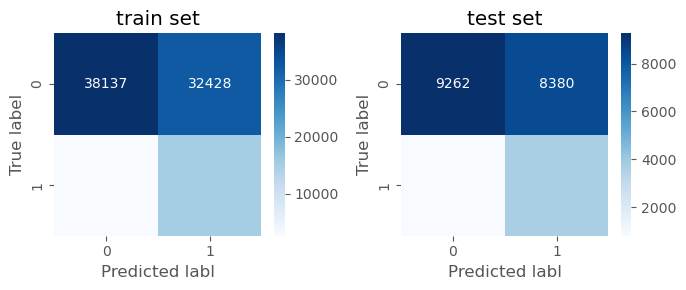

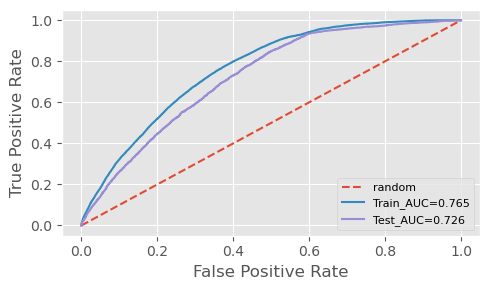

In [96]:
steps=[("scaler", StandardScaler()),
       ("Ensemble", RandomForestClassifier(class_weight='balanced', n_estimators = 100, min_samples_split = 40,
                                          min_samples_leaf = 1, max_features = 'log2', max_depth = 10, bootstrap = False))]

rfc = Pipeline(steps)
model_rfc = rfc.fit(X_train, y_train)

report_loss_cf('RandomForest', model_rfc, X_train, y_train, X_test, y_test, graph = 1)

- After Hyperperamter tuning, the overfitting is reduced. 

## XGBoost


In [97]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


Model performance for:  XGBoost
train set accuracy: 0.814
train set precision: 0.809
train set recall: 0.814
train set f1 score: 0.754
training set AUC score: 0.805

test set accuracy: 0.798
test set precision: 0.746
test set recall: 0.798
test set f1 score: 0.732
test set AUC score: 0.732


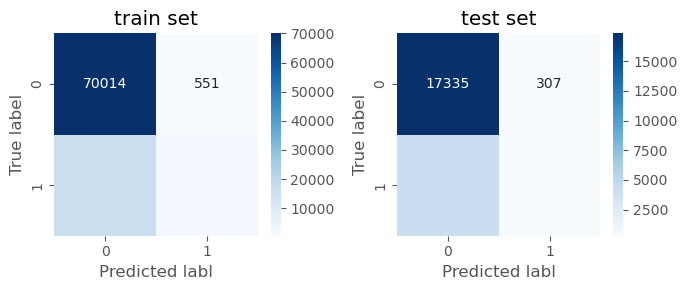

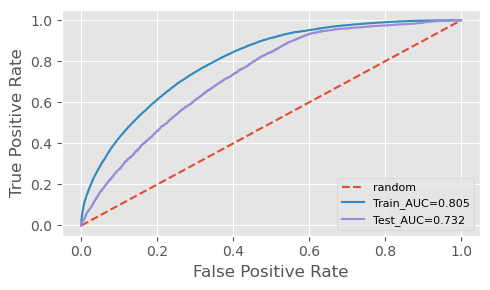

In [98]:
start = time.time()

steps=[("scaler", StandardScaler()),       
       ("xgb", XGBClassifier(random_state=42))]

xgb = Pipeline(steps)
model_xgb = xgb.fit(X_train, y_train)

# fit the pipeline to the training data
model_xgb = xgb.fit(X_train, y_train)

report_loss_cf('XGBoost', model_xgb, X_train, y_train, X_test, y_test, graph = 1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Hyperparameter tuning took 231.95 seconds
Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8511577659794545, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.04885479070240845, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=9,
                               max_

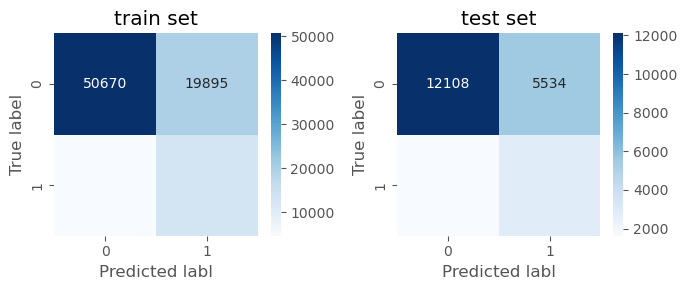

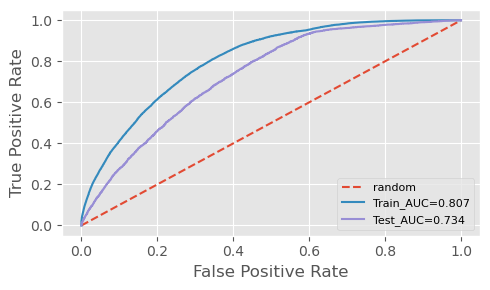

In [99]:
# Define the parameter grid for hyperparameter tuning
param_dist = {
    'xgb__n_estimators': randint(20, 110),
    'xgb__max_depth': randint(2, 12),
    'xgb__min_child_weight': randint(1, 10),
    'xgb__learning_rate': uniform(0.01, 0.2),
    'xgb__subsample': uniform(0.6, 0.4),
    'xgb__colsample_bytree': uniform(0.6, 0.4),
    'xgb__reg_alpha': uniform(0.0, 1.0),
    'xgb__reg_lambda': uniform(0.0, 1.0),
    'xgb__scale_pos_weight': [1, 2, 3, 4, 5]
}

# Define the pipeline steps
steps = [("scaler", StandardScaler()),       
         ("xgb", XGBClassifier(use_label_encoder=False, random_state=42))]

# Create the pipeline
xgb_pipeline = Pipeline(steps)

# Create the randomized search cross-validator
random_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_dist,
    n_iter=100,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Perform hyperparameter tuning
start = time.time()
random_search.fit(X_train, y_train)
end = time.time()

print(f"Hyperparameter tuning took {end - start:.2f} seconds")

# Get the best model
best_xgb = random_search.best_estimator_
print(best_xgb)

# Use the custom function to report results
report_loss_cf('XGBoost', best_xgb, X_train, y_train, X_test, y_test, graph=1)

         Feature  Importance
9  date_gap_days    0.392748
8   SMS_received    0.228460
1            Age    0.059361
2     LocationID    0.052380
7     Disability    0.050092
6     Alcoholism    0.049140
3    MedicaidIND    0.043571
4   Hypertension    0.043090
5       Diabetes    0.040966
0         Gender    0.040192


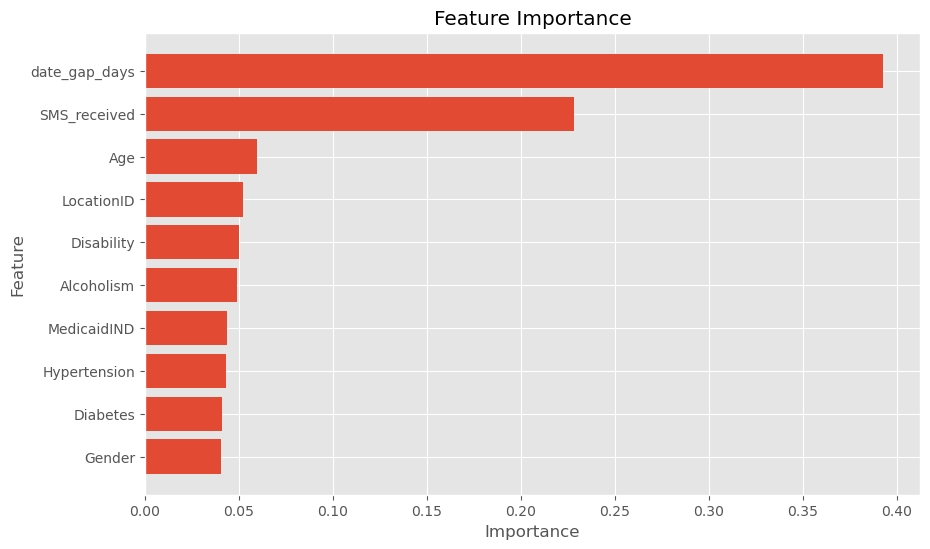

In [100]:
best_xgb_pipeline = random_search.best_estimator_

# Extract the XGBoost model from the pipeline
best_xgb = best_xgb_pipeline.named_steps['xgb']

# Get feature importances
feature_importances = best_xgb.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

Summary:
- Xgboost has the best performace. But overfitting.
- Most importance feature is Appoinment schdule gap time, SMS_received, Age.
- Depend on Business purpose, if precision is importance, I will vote for Random Forest.
- The feature importance from xgboost is different from Logistic regression, casue the model put too much weight on saturday schedule, while the people number is less. should drop the schedule_weekday and re-run the models.




- Recommendations 
* Real life Operational improvement for hospital

We know what are the features that have predicting power for no-shows, such as age, and gaps between scheduled appointment 
Optimize scheduling practices (eg: overbooking in a controlled manner to account for expected no-shows, and identify patients that are high-risk for no-shows and provide additional support) 

* Future enhancements 
Explore additional features and external data sources (eg: weather conditions, transportation data) that could future improve the model’s predictive power 
Drop features such as diabetes and hypertension that do not have high predicting power
